In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

np.random.seed(0)

Signal: tt (500,), xx (500,); f1 = 50 Hz, T1 = 0.02 s; f2 = 120 Hz, T2 = 0.008333333333333333 s; f3 = 1 Hz, T3 = 1.0 s
Mean: x_mean = 1.5013999999999998, Energy: E = 3.002


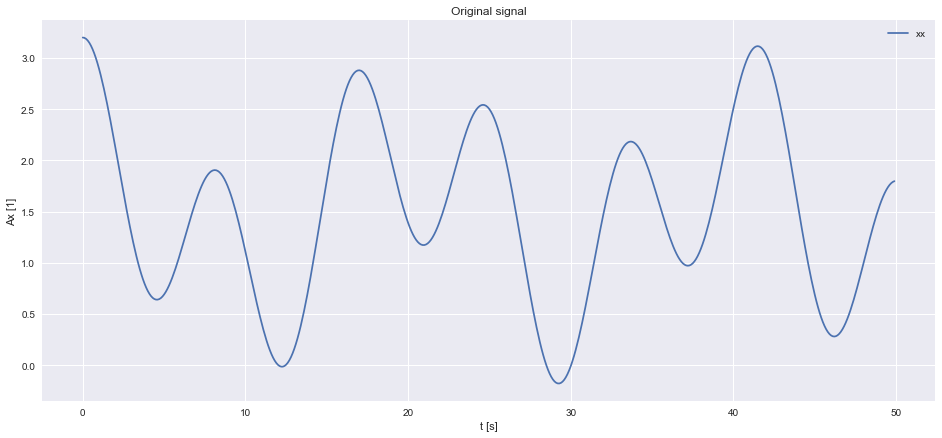

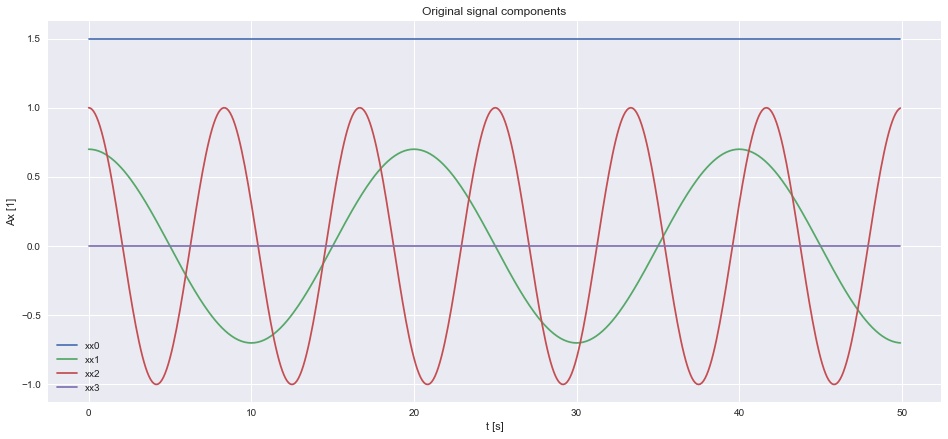

In [2]:
# Full signal
tt = np.arange(0, 0.05, 0.0001) # [sec]
L = tt.shape[0]  # Signal length

A0 = 1.5

f1 = 50
T1 = 1/f1
A1 = 0.7

f2 = 120
T2 = 1/f2
A2 = 1

f3 = 1
T3 = 1/f3
A3 = 0

xx0 = A0 * np.ones_like(tt)
xx1 = A1 * np.cos(2 * np.pi * f1 * tt)
xx2 = A2 * np.cos(2 * np.pi * f2 * tt)
xx3 = A3 * np.cos(2 * np.pi * f3 * tt)

xx = xx0 + xx1 + xx2 + xx3
print("Signal: tt {}, xx {}; f1 = {} Hz, T1 = {} s; f2 = {} Hz, T2 = {} s; f3 = {} Hz, T3 = {} s"
      .format(str(tt.shape), str(xx.shape), f1, T1, f2, T2, f3, T3))
print("Mean: x_mean = {}, Energy: E = {}".format(xx.mean(), np.square(np.abs(xx)).mean()))

plt.figure(figsize=(16, 7))
plt.plot(1000 * tt, xx)
plt.legend(["xx"])
plt.title("Original signal")
plt.ylabel("Ax [1]")
plt.xlabel("t [s]")
plt.show()

# Time in miliseconds
plt.figure(figsize=(16, 7))
plt.plot(1000 * tt, xx0, 1000 * tt, xx1, 1000 * tt, xx2, 1000 * tt, xx3)
plt.legend(["xx0", "xx1", "xx2", "xx3"])
plt.title("Original signal components")
plt.ylabel("Ax [1]")
plt.xlabel("t [s]")
plt.show()

Sampling: Ts = 0.002 s, fs = 500 Hz, ns (1999,) [0 1 2], ts (1999,) [0.    0.002 0.004]
Mean: x_mean = 1.484513307043932, Energy: E = 3.882037337805497


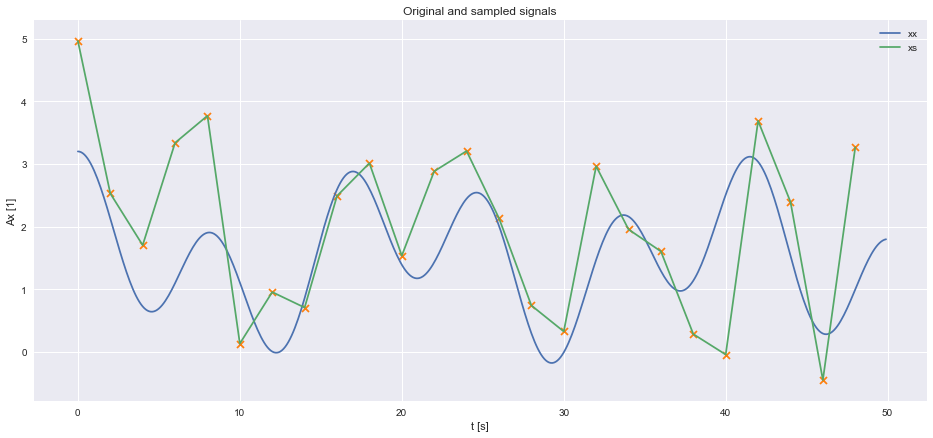

Xs (1999,), X[0] = 1.4845133070439318, mean(xs) = 1.484513307043932


In [3]:
# Sampled signal
fs = 500  # Sampling frequency [Hz]
Ts = 1/fs  # Sampling period [sec]
N = 1999 # Signal length, Number of measurements

ns = np.arange(0, N, 1) # Sampling indices [0, 1, ..., N-1]
ts = Ts * ns  # Sampling times [0, T, 2T, ..., (N-1)T]

print("Sampling: Ts = {} s, fs = {} Hz, ns {} {}, ts {} {}".format(Ts, fs, str(ns.shape), str(ns[0:3]), 
                                                                   str(ts.shape), str(ts[0:3])))

# Sampling
xs0 = A0 * np.ones_like(ts)
xs1 = A1 * np.cos(2 * np.pi * f1 * ts)
xs2 = A2 * np.cos(2 * np.pi * f2 * ts)
xs3 = A3 * np.cos(2 * np.pi * f3 * ts)
xs = xs0 + xs1 + xs2 + xs3  # [x(0), x(T), ..., x((N-1)T)] = [x[0], x[1], ..., x[N-1]]

# Measurement noise
xs = xs + np.random.normal(size=xs.shape)


print("Mean: x_mean = {}, Energy: E = {}".format(xs.mean(), np.square(np.abs(xs)).mean()))

plt.figure(figsize=(16, 7))
plt.plot(1000 * tt, xx, 1000 * ts[0:25], xs[0:25])
plt.scatter(1000 * ts[0:25], xs[0:25], marker="x", c="tab:orange")
plt.legend(["xx", "xs"])
plt.title("Original and sampled signals")
plt.ylabel("Ax [1]")
plt.xlabel("t [s]")
plt.show()

# Discrete Fourier Transform
Xs = np.fft.fft(xs / N)  # [X[0], X[1], ..., X[N-1]]
ks = ns  # Frequency indices

# freqs = fs / N * ks  # Frequencies in range [0, fs]
freqs = np.fft.fftfreq(N, d=1/fs) # Frequencies in range [-fs/2, fs/2]

print("Xs {}, X[0] = {}, mean(xs) = {}".format(str(Xs.shape), np.abs(Xs[0]), xs.mean()))

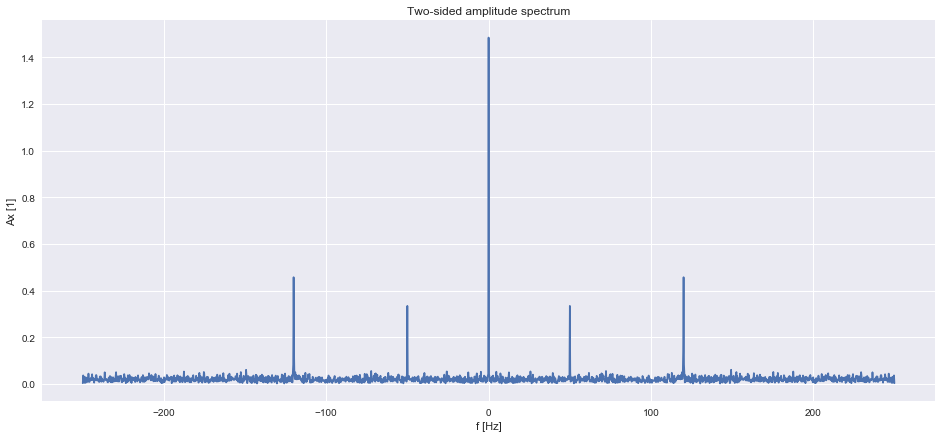

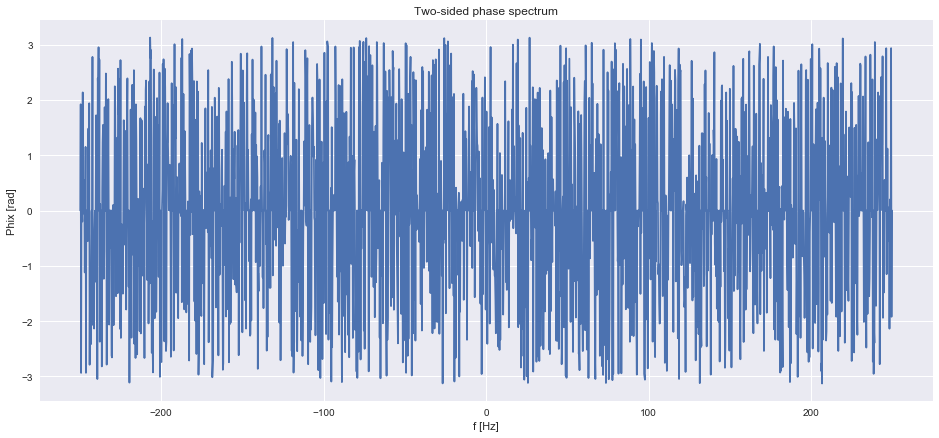

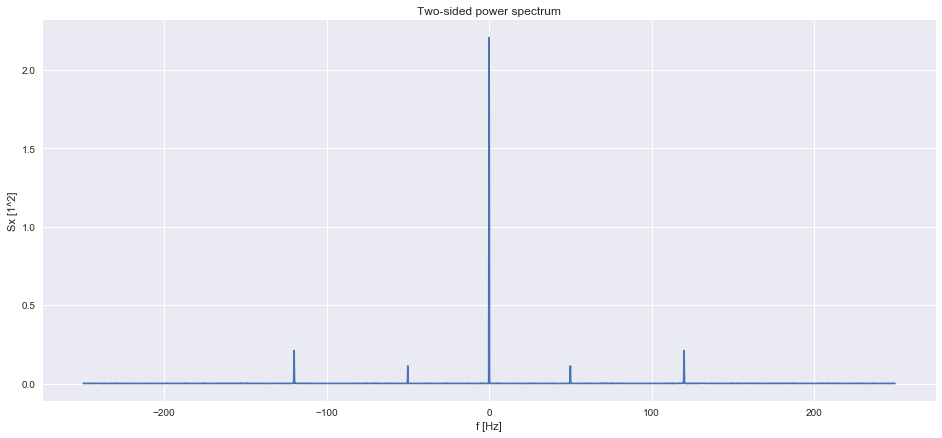

Parseval's Theorem: mean(|xs|^2) = sum(Ss), 3.882037337805497 = 3.882037337805497


In [4]:
# Two sided
# Amplitude and Phase Spectrum
As = np.abs(Xs)
Phis = np.angle(Xs, deg=False)

# Correct Phase Spectrum
Phis[np.less(As, 1e-2)] = 0
Phis[0] = 0

# Frequency range to [-fs/2, fs/2]
freqs_shift = np.fft.fftshift(freqs)
# freqs_shift[0:np.argmin(freqs_shift)] = freqs_shift[0:np.argmin(freqs_shift)] - fs

plt.figure(figsize=(16, 7))
plt.plot(freqs_shift, np.fft.fftshift(As), label="As")
plt.title("Two-sided amplitude spectrum")
plt.ylabel("Ax [1]")
plt.xlabel("f [Hz]")
plt.show()

plt.figure(figsize=(16, 7))
plt.plot(freqs_shift, np.fft.fftshift(Phis), label="Phis")
plt.title("Two-sided phase spectrum")
plt.ylabel("Phix [rad]")
plt.xlabel("f [Hz]")
plt.show()

# Power spectrum
Ss = np.square(np.abs(Xs))

plt.figure(figsize=(16, 7))
plt.plot(freqs_shift, np.fft.fftshift(Ss), label="Ss")
plt.title("Two-sided power spectrum")
plt.ylabel("Sx [1^2]")
plt.xlabel("f [Hz]")
plt.show()

print("Parseval's Theorem: mean(|xs|^2) = sum(Ss), {} = {}".format(np.mean(np.square(np.abs(xs))), np.sum(Ss)))

Frequencies (1000,), [0.0, ..., 249.87493746873434]


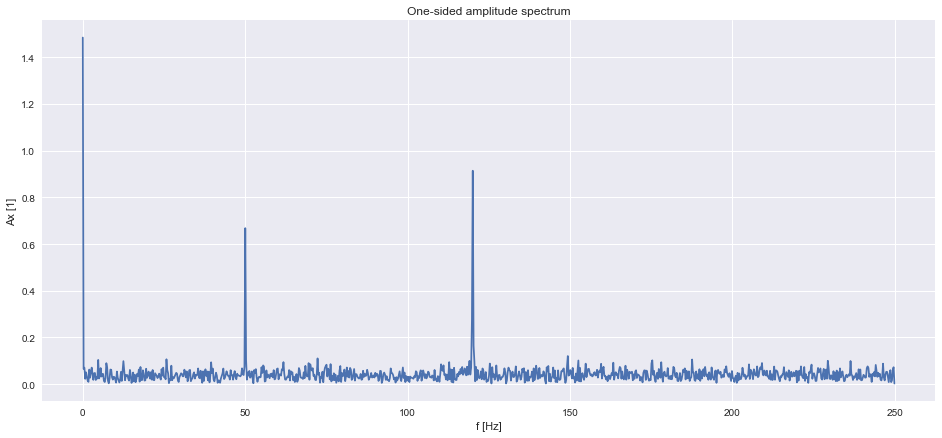

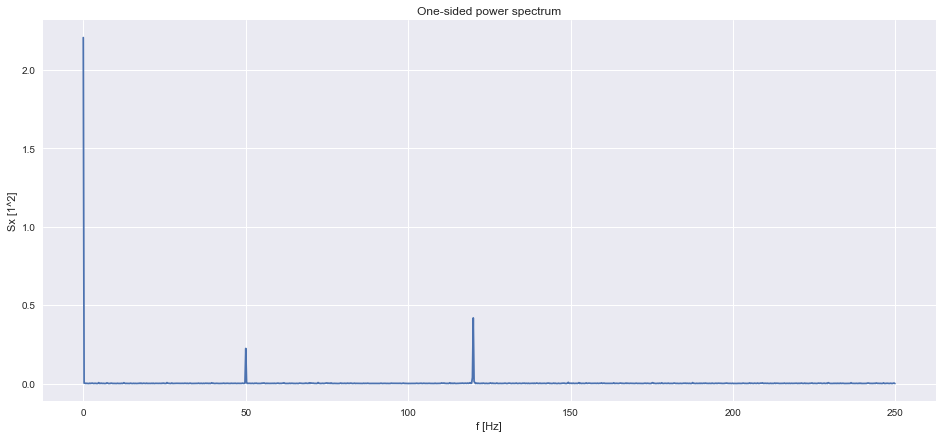

In [5]:
# One-sided 
freqs_one = freqs[0:int(N/2 + 1)]
print("Frequencies {}, [{}, ..., {}]".format(str(freqs_one.shape), freqs_one[0], freqs_one[-1]))

As_one = As[0:int(N/2 + 1)].copy()
Ss_one = np.square(np.abs(As_one).copy())
As_one[1:-1] = 2 * As_one[1:-1]
Ss_one[1:-1] = 2 * Ss_one[1:-1]

plt.figure(figsize=(16, 7))
plt.plot(freqs_one, As_one, label="As")
plt.title("One-sided amplitude spectrum")
plt.ylabel("Ax [1]")
plt.xlabel("f [Hz]")
plt.show()

plt.figure(figsize=(16, 7))
plt.plot(freqs_one, Ss_one, label="As")
plt.title("One-sided power spectrum")
plt.ylabel("Sx [1^2]")
plt.xlabel("f [Hz]")
plt.show()

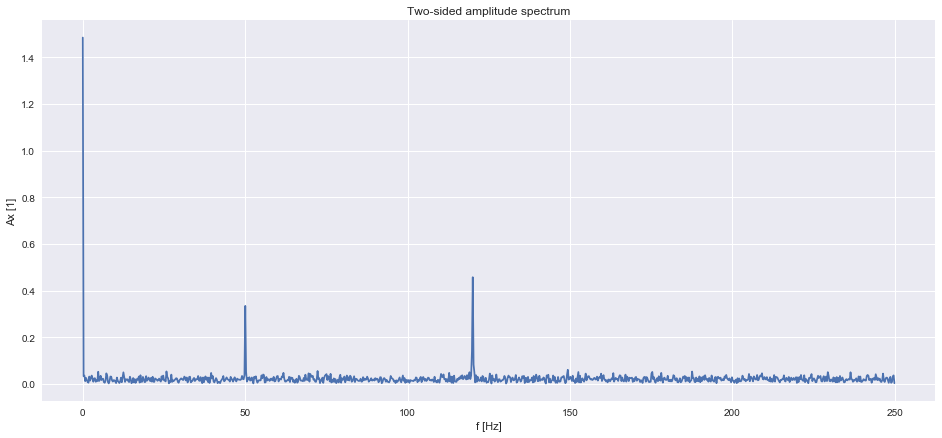

In [6]:
# Discrete Fourier Transform of Real Signal
Xs = np.fft.rfft(xs) / N
freqs = np.fft.rfftfreq(N, 1/fs)

As = np.abs(Xs)

# Two-sided
plt.figure(figsize=(16, 7))
plt.plot(freqs, As, label="As")

plt.title("Two-sided amplitude spectrum")
plt.ylabel("Ax [1]")
plt.xlabel("f [Hz]")
plt.show()